In [1]:

import pandas as pd
import numpy as np
import os
def smooth(csv_path, weight=0.85):
    data = pd.read_csv(filepath_or_buffer=csv_path,header=0,names=['Step','Value'],dtype={'Step':int,'Value':np.float64})
    scalar = data['Value'].values
    last = scalar[0]
    smoothed = []
    for point in scalar:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val

    save = pd.DataFrame({'Step':data['Step'].values,'Value':smoothed})
    # print(save)
    # return 'smooth_'+csv_path
    return data['Step'].values, smoothed

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# import numpy as np
from matplotlib.font_manager import FontProperties
import csv

mpl.rcParams['font.sans-serif'] = 'ubuntu'

def readcsv(files):
    csvfile = open(files, 'r')
    plots = csv.reader(csvfile, delimiter=',')
    x = []
    y = []
    for row in plots:
        # print(row)
        y.append((row[2]))
        x.append((row[1]))
    return x ,y
 
# mpl.rcParams['font.family'] = 'sans-serif'

# Mini-Grid Plot

## Low Level

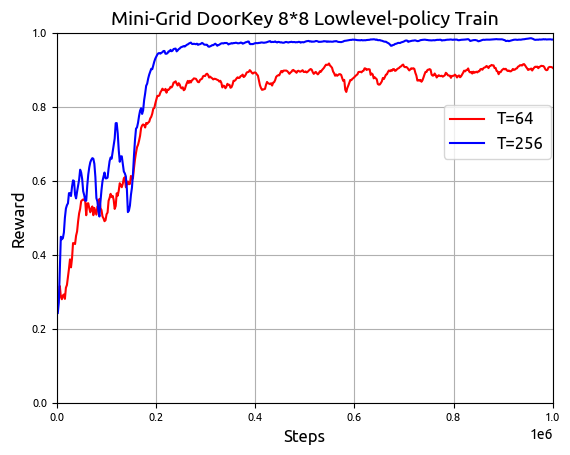

In [3]:
lowl_64t_8 = './mini-data/lowlevel_64t_88.csv'
lowl_256t_8 = './mini-data/lowlevel_256t_88.csv'
x, y = smooth(lowl_64t_8, weight=0.80)
x2, l256t = smooth(lowl_256t_8, weight=0.80)
plt.figure()
 
# x, y = readcsv(out_csv)
plt.plot(x, y, 'r', label='T=64')
plt.plot(x2, l256t, 'b', label='T=256')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
 
plt.ylim(0, 1)
plt.xlim(0, 1000000)
plt.title('Mini-Grid DoorKey 8*8 Lowlevel-policy Train', fontsize=14) 
plt.xlabel('Steps',fontsize=12)
plt.ylabel('Reward',fontsize=12)
plt.legend(fontsize=12, loc=(0.78,0.66))
plt.grid()
plt.show()

## ALL

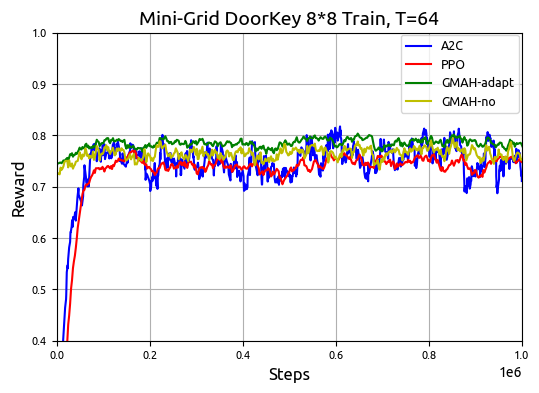

In [12]:
# 64t
a2c_64 = './mini-data/a2c_64t_0406_88.csv'
ppo_64 = './mini-data/ppo_64t_0406_88.csv'
adapt_64 = './mini-data/hppo-adapt_64t_88.csv'
no_64 = './mini-data/hppo-no_64t_88.csv'

a2c_x, a2c_y = smooth(a2c_64, weight=0.89)
ppo_x, ppo_y = smooth(ppo_64, weight=0.89)
adapt_x, adapt_y = smooth(adapt_64, weight=0.89)
no_x, no_y = smooth(no_64, weight=0.80)
# ?
# adapt_y = [i+0.03 for i in adapt_y]
# no_y = [i+0.01 for i in no_y]
plt.figure(figsize=(6,4))

# x, y = readcsv(out_csv)
plt.plot(a2c_x, a2c_y, 'b', label='A2C')
# plt.semilogy(a2c_x, a2c_y, 'b', label='A2C')
plt.plot(ppo_x, ppo_y, 'r', label='PPO')
plt.plot(adapt_x, adapt_y, 'g', label='GMAH-adapt')
plt.plot(no_x, no_y, 'y', label='GMAH-no')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
 
plt.ylim(0.4, 1)
plt.xlim(0, 1000000)
plt.title('Mini-Grid DoorKey 8*8 Train, T=64', fontsize=14) 
plt.xlabel('Steps',fontsize=12)
plt.ylabel('Reward',fontsize=12)
plt.legend(fontsize=9, loc=(0.74,0.74))
plt.grid()
plt.show()

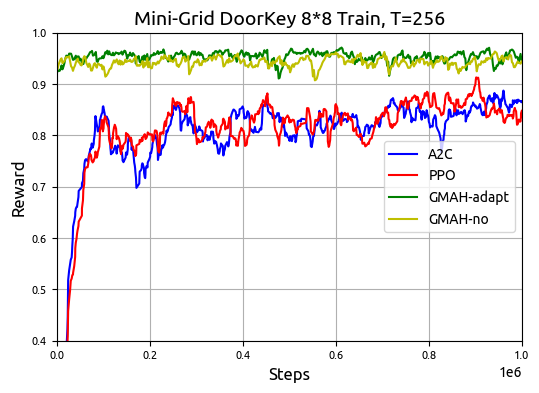

In [8]:
# 256t
a2c_256 = './mini-data/a2c_256t_0406_88.csv'
ppo_256 = './mini-data/ppo_256t_0406_88.csv'
adapt_256 = './mini-data/hppo-adapt_256t_88.csv'
no_256 = './mini-data/hppo-no_256t_88.csv'

a2c_x, a2c_y = smooth(a2c_256, weight=0.95)
ppo_x, ppo_y = smooth(ppo_256, weight=0.95)
adapt_x, adapt_y = smooth(adapt_256, weight=0.80)
no_x, no_y = smooth(no_256, weight=0.80)
plt.figure(figsize=(6,4))

# x, y = readcsv(out_csv)
plt.plot(a2c_x, a2c_y, 'b', label='A2C')
# plt.semilogy(a2c_x, a2c_y, 'b', label='A2C')
plt.plot(ppo_x, ppo_y, 'r', label='PPO')
plt.plot(adapt_x, adapt_y, 'g', label='GMAH-adapt')
plt.plot(no_x, no_y, 'y', label='GMAH-no')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.ylim(0.4, 1)
plt.xlim(0, 1000000)
plt.title('Mini-Grid DoorKey 8*8 Train, T=256', fontsize=14) 
plt.xlabel('Steps',fontsize=12)
plt.ylabel('Reward',fontsize=12)
plt.legend(fontsize=10, loc='center right')
plt.grid()
plt.show()

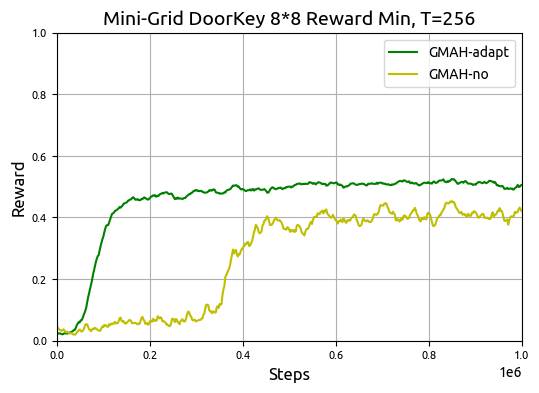

In [9]:
# Reward Min----adapt and no
# 640t
adapt_rew_min_256 = './mini-data/adapt_rew_min_256t_88.csv'
no_rew_min_256 = './mini-data/no_rew_min_256t_88.csv'

adapt_x, adapt_y = smooth(adapt_rew_min_256, weight=0.89)
no_x, no_y = smooth(no_rew_min_256, weight=0.80)
plt.figure(figsize=(6,4))


plt.plot(adapt_x, adapt_y, 'g', label='GMAH-adapt')
plt.plot(no_x, no_y, 'y', label='GMAH-no')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
 
plt.ylim(0, 1)
plt.xlim(0, 1000000)
plt.title('Mini-Grid DoorKey 8*8 Reward Min, T=256', fontsize=14) 
plt.xlabel('Steps',fontsize=12)
plt.ylabel('Reward',fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.grid()
plt.show()

# Trash-Grid Plot

## Low Level

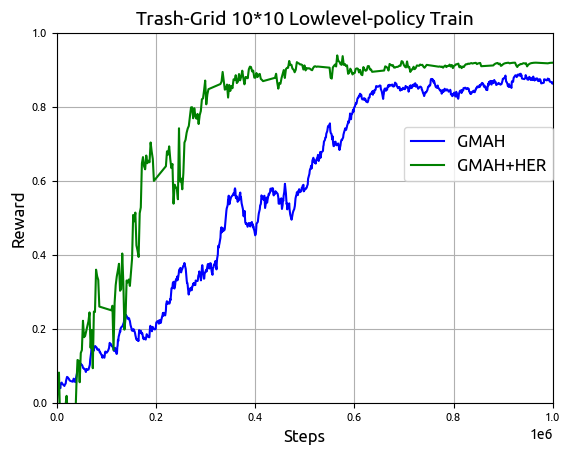

In [16]:
low_128t = './trash-data/gmah_low_128t_1.csv'
# low_2 = './trash-data/gmah_low_2.csv'
# 这个有系数非常低的iner_rew
low_her = './trash-data/gmah_low_3.csv'
# low_128t_her = './trash-data/gmah_low_128t_her.csv'
x, y = smooth(low_128t, weight=0.97)
# x_her, y_her = smooth(low_128t_her, weight=0.97)
# x2, y2 = smooth(low_2, weight=0.99)
x3, y3 = smooth(low_her, weight=0.6)
plt.figure()


plt.plot(x, y, 'b', label='GMAH')
plt.plot(x3, y3, 'g', label='GMAH+HER')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
 
plt.ylim(0, 1)
plt.xlim(0, 1000000)
plt.title('Trash-Grid 10*10 Lowlevel-policy Train', fontsize=14) 
plt.xlabel('Steps',fontsize=12)
plt.ylabel('Reward',fontsize=12)
plt.legend(fontsize=12, loc=(0.70,0.60))
plt.grid()
plt.show()

## ALL

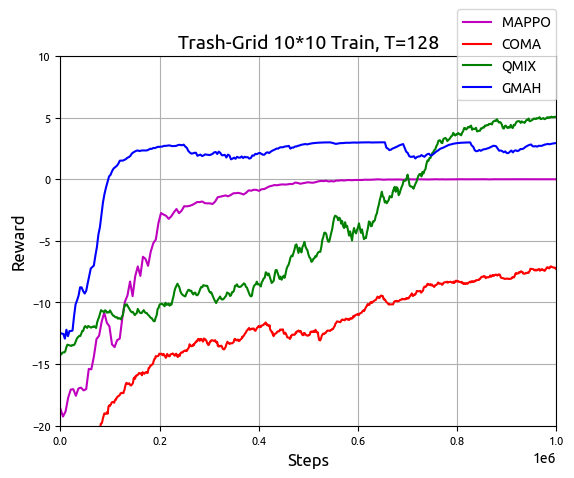

In [72]:
# MAPPO QMIX COMA ---- GMAH

alg1 = './trash-data/trash_alg_1.csv'
a2cx, a2cy = smooth(alg1, weight=0.89)
a2c_x = [x for x in a2cx]
# reward 缩放
a2c_y = [y * 20 - 20 for y in a2cy]

# GMAH
gmah = './trash-data/trash_gmah_1.csv'
gmahx, gmahy = smooth(gmah, weight=0.80)
gmah_y = [y + 0.2 for y in gmahy]

# MAPPO
mappo_128t = './trash-data/mappo_128t.csv'
mappo_x, mappo_y = smooth(mappo_128t, weight=0.40)
# 20episode一次 256t*20
x1 = [x * 5200 for x in mappo_x]

# QMIX
# qmix = './trash-data/trash_qmix.csv'
# qx, qy = smooth(qmix, weight=0.96)

# QMIX
qmix = './trash-data/trash_qmix_2.csv'
gx, gy = smooth(qmix, weight=0.96)
plt.figure()

# COMA
alg2 = './trash-data/trash_alg_2.csv'
alg2x, alg2y = smooth(alg2, weight=0.99)


plt.plot(x1, mappo_y, 'm', label='MAPPO')
plt.plot(alg2x,alg2y, 'r', label='COMA')
plt.plot(gx, gy, 'g', label='QMIX')
plt.plot(gmahx, gmahy, 'b', label='GMAH')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
 
plt.ylim(-20, 10)
plt.xlim(0, 1e6)
plt.title('Trash-Grid 10*10 Train, T=128', fontsize=14) 
plt.xlabel('Steps',fontsize=12)
plt.ylabel('Reward',fontsize=12)
plt.legend(fontsize=10, loc=(0.80,0.88))
plt.grid()
plt.show()

## G-Mix

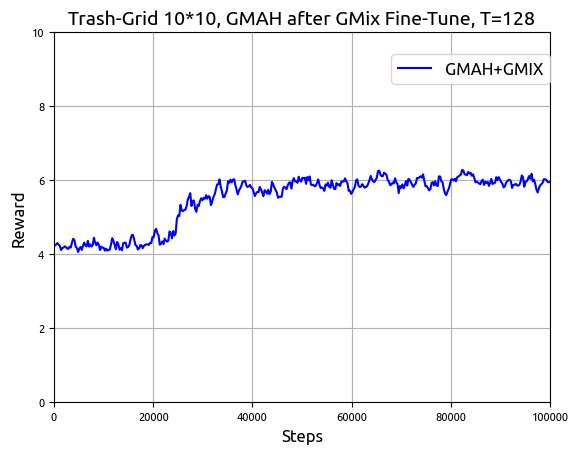

In [44]:
# G-Mix Fine Tune
gmix = './trash-data/trash_gmix.csv'


x1, y1 = smooth(gmix, weight=0.4)

x1 = [(_-18000)  for _ in x1]
# x2, y2 = smooth(qmix_128t, weight=0.92)
plt.figure()

plt.plot(x1, y1, 'b', label='GMAH+GMIX')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
 
plt.ylim(0, 10)
plt.xlim(0, 1e5)
plt.title('Trash-Grid 10*10, GMAH after GMix Fine-Tune, T=128', fontsize=14) 
plt.xlabel('Steps',fontsize=12)
plt.ylabel('Reward',fontsize=12)
plt.legend(fontsize=12, loc=(0.68,0.86))
plt.grid()
plt.show()

## Fine Tune

# 轨迹热力图

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
taus = np.load('/home/zct/project/customEnv/hmpe/ppotrain/runs/trash_1_04-16-2251/tau.npy')
taus.shape # all_length, agents, episode_steps, row, col

(1445, 3, 100, 2)

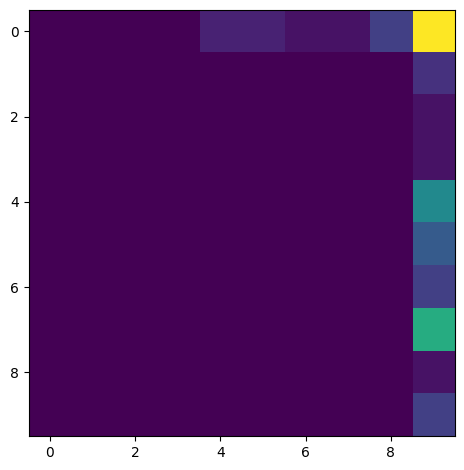

In [9]:
heatmap = [[ 0.,  0.,  0.,  0.,  2.,  2.,  1.,  1.,  4., 21.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]]
plt.imshow(heatmap)
plt.tight_layout()
plt.show()

In [112]:
def plotmap(file, start, end, agent):
    # file
    cunt = 0
    taus = np.load(file)
    heatmap = np.zeros((10, 10))
    for tau in taus[start:end+1]:
        for x,y in tau[agent]:
            # print(x, y)
            heatmap[int(x),int(y)] += 1 if int(x) != -1 and int(y) != -1 else 0
            if x == 0 and y == 9:
                cunt += 1
    print(heatmap)
    plt.imshow(heatmap)
    plt.tight_layout()
    plt.show()
    # print(cunt)
    return heatmap

[[ 51.  88.  81. 111. 214. 129. 119.  19.  13. 428.]
 [ 16.  26.  46.  41. 191.  92.  80.  35.  19. 170.]
 [ 50.  62.  56.  98. 185.  75.  58.  26.  12.  40.]
 [ 27.  27.  17.  17.  64.  42.  25. 106.  16.  53.]
 [ 13.  29.  20.  31.  65.   8.  18.   3.  10.   6.]
 [  0.   9.   2.  36.  86.  48.   9.   9.   2.  18.]
 [  0.  33.  34.   4.  22.  42.  33.   3.   0.  29.]
 [  0.   0.  17.   6.  24.  11.  16.   7.   0.   9.]
 [  0.   0.   0.  14.  16.   0.   0.   0.   0.   2.]
 [  0.   0.   0.   0.  13.   0.   0.   0.   0.   3.]]


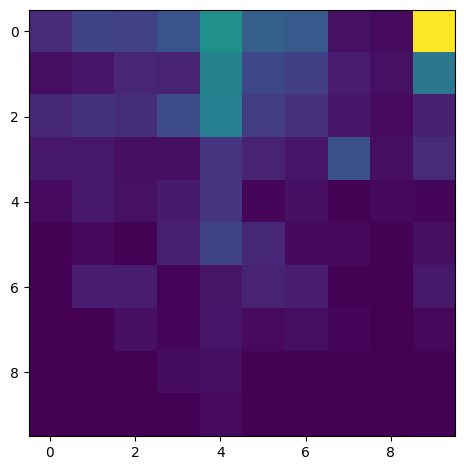

In [159]:
file = '/home/zct/project/customEnv/hmpe/ppotrain/runs/trash_1_04-16-2251/tau.npy'
h = plotmap(file,00,500,2)

In [160]:
h

array([[ 51.,  88.,  81., 111., 214., 129., 119.,  19.,  13., 428.],
       [ 16.,  26.,  46.,  41., 191.,  92.,  80.,  35.,  19., 170.],
       [ 50.,  62.,  56.,  98., 185.,  75.,  58.,  26.,  12.,  40.],
       [ 27.,  27.,  17.,  17.,  64.,  42.,  25., 106.,  16.,  53.],
       [ 13.,  29.,  20.,  31.,  65.,   8.,  18.,   3.,  10.,   6.],
       [  0.,   9.,   2.,  36.,  86.,  48.,   9.,   9.,   2.,  18.],
       [  0.,  33.,  34.,   4.,  22.,  42.,  33.,   3.,   0.,  29.],
       [  0.,   0.,  17.,   6.,  24.,  11.,  16.,   7.,   0.,   9.],
       [  0.,   0.,   0.,  14.,  16.,   0.,   0.,   0.,   0.,   2.],
       [  0.,   0.,   0.,   0.,  13.,   0.,   0.,   0.,   0.,   3.]])

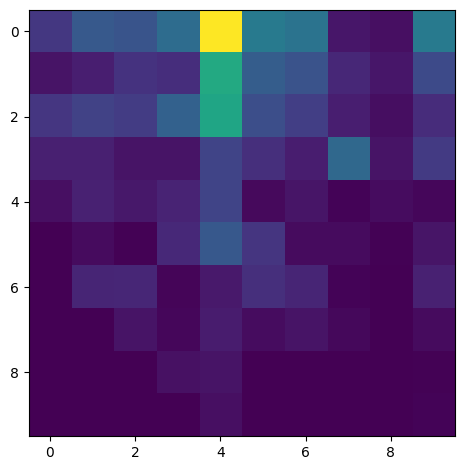

In [163]:
# tau 0
plt.imshow(h)
plt.tight_layout()
plt.show()


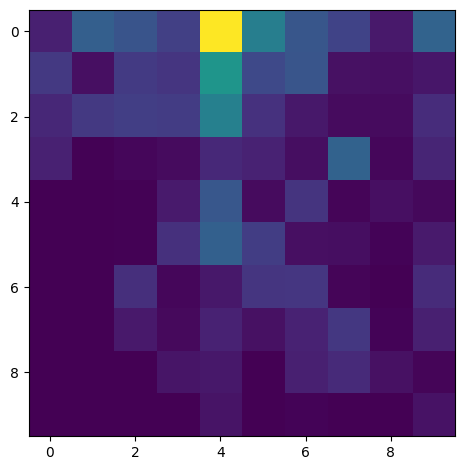

In [ ]:
# tau 1
plt.imshow(h)
plt.tight_layout()
plt.show()

In [79]:
taus = np.load(file)
taus[200,2]

array([[0., 4.],
       [0., 4.],
       [1., 4.],
       [2., 4.],
       [2., 4.],
       [2., 4.],
       [2., 4.],
       [1., 4.],
       [1., 4.],
       [1., 4.],
       [1., 4.],
       [1., 4.],
       [2., 4.],
       [2., 4.],
       [2., 4.],
       [2., 4.],
       [2., 4.],
       [1., 4.],
       [1., 4.],
       [0., 4.],
       [0., 4.],
       [0., 4.],
       [0., 4.],
       [0., 4.],
       [0., 4.],
       [0., 4.],
       [0., 4.],
       [1., 4.],
       [2., 4.],
       [2., 4.],
       [2., 4.],
       [2., 4.],
       [2., 4.],
       [2., 4.],
       [2., 4.],
       [2., 4.],
       [2., 4.],
       [2., 4.],
       [1., 4.],
       [1., 4.],
       [1., 4.],
       [1., 4.],
       [1., 3.],
       [1., 2.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [2., 0.